In [1]:
import numpy as np
import pandas as pd
from math import *
data = pd.read_excel("https://github.com/junaart/ForStudents/blob/master/Big_Data/Zachet/DataSets/5.xlsx?raw=true", sheet_name="Лист1")
D = data[['Sum-Avg-Р823']]


In [2]:
display(data)
display(D)

,town1,Sum-Avg-Р811,Sum-Avg-Р812,Sum-Avg-Р813,Sum-Avg-Р814,Sum-Avg-Р815,Sum-Avg-Р821,Sum-Avg-Р822,Sum-Avg-Р823,Sum-Avg-Р824,Sum-Avg-Р825,Sum-Avg-Р826
0,Абакан,1.918825e+03,8954.6250,33.725000,1796.25000,11138.525000,2.541233e+04,130.3000,30.0000,18.850000,17.200000,0.000000
1,Азовский район,6.811933e+03,0.0000,0.000000,0.00000,79440.066667,9.480033e+03,0.0000,815.1000,0.000000,48562.933333,0.000000
2,Аксайский район,7.125582e+04,0.0000,0.000000,0.00000,51530.400000,8.716662e+04,0.0000,4957.3925,0.000000,41171.825000,6267.700000
3,Алексеевкий район,1.230500e+03,0.0000,0.000000,0.00000,371.900000,4.782000e+02,0.0000,0.0000,0.000000,0.000000,0.000000
4,Анапа,8.225300e+03,0.0000,0.000000,0.00000,4965.700000,2.213350e+03,0.0000,0.0000,0.000000,0.000000,2752.350000
...,...,...,...,...,...,...,...,...,...,...,...,...
276,Южно-Сахалинск,4.128817e+05,6014.1500,133902.700000,94626.55000,148720.115000,8.441777e+05,956.9055,87.9500,315633.283250,948.500000,2593.877500
277,Якутск,1.711287e+06,136877.2175,88569.590500,11221.81025,114265.795250,2.173559e+06,17260.6250,4784.8375,5677.307500,3841.350000,158407.882500
278,Ялта,3.921625e+05,111159.7000,925.000000,100.00000,21083.150000,5.135638e+05,4912.2500,0.0000,1.650000,50144.500000,3393.100000
279,Ярославль,2.688059e+05,204442.7000,92436.108333,4781.80000,138296.366667,4.082314e+05,3007.3750,203.7500,594857.658333,1571.075000,34727.841667


,Sum-Avg-Р823
0,30.0000
1,815.1000
2,4957.3925
3,0.0000
4,0.0000
...,...
276,87.9500
277,4784.8375
278,0.0000
279,203.7500


# Блок 1

# Задание 1

In [3]:
import statistics as stats
Ds=D[(D['Sum-Avg-Р823']>0)]
f=np.array(Ds['Sum-Avg-Р823'])

SrZn=f.mean()
SrGeom=stats.geometric_mean(f)
SrGarm=stats.harmonic_mean(f)
Median=np.median(f)

print("Значение среднего арифметического:",SrZn)
print("Значение среднего геометрического: ", SrGeom)
print("Значение среднего гармонического:", SrGarm)
print("Значение медианы:", Median)

Значение среднего арифметического: 57371.28335881295
Значение среднего геометрического:  769.8088532487311
Значение среднего гармонического: 30.270845417018617
Значение медианы: 747.55


# Задание 2

In [4]:
Q1 = np.percentile(D, 25, interpolation = 'midpoint')
Q3 = np.percentile(D, 75, interpolation = 'midpoint')

print("Певрвый квартиль:", Q1)
print("Третий квартиль:", Q3)

Певрвый квартиль: 0.0
Третий квартиль: 746.3333333333334


# Задание 3

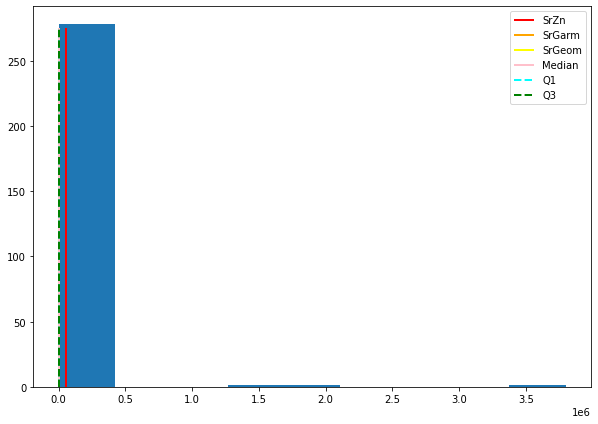

In [5]:
from collections import Counter
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(10,7))
pl = fig.add_subplot(111)

pl.hist(D,bins=int(1+log2(len(D))),rwidth=1)
pl.vlines(SrZn,0,275,color='red',ls='-',lw=2,label='SrZn')
pl.vlines(SrGarm,0,275,color='orange',ls='-',lw=2,label='SrGarm')
pl.vlines(SrGeom,0,275,color='yellow',ls='-',lw=2,label='SrGeom')
pl.vlines(Median,0,275,color='pink',ls='-',lw=2,label='Median')
pl.vlines(Q1,0,275,color='cyan',ls='--',lw=2,label='Q1')
pl.vlines(Q3,0,275,color='green',ls='--',lw=2,label='Q3')

plt.legend()
plt.show()



# Задание 4

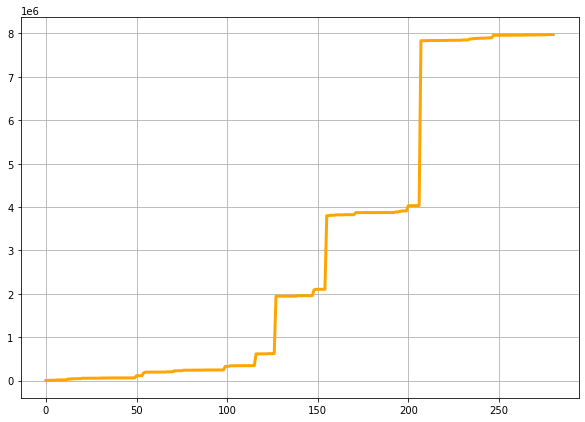

In [6]:
AccumulateData = np.cumsum(D)

fig=plt.figure(figsize=(10,7))
pl = fig.add_subplot(111)

pl.plot(range(0,len(data)),AccumulateData,ls='-',lw=3,c='orange')
plt.grid(True)
plt.show()

# Задание 5

In [7]:
DHist = np.histogram(D)
intervalMid = [ (DHist[1][i]+DHist[1][i+1])/2 for i in range(len(DHist[1])-1) ]
intervalStr = [ str(DHist[1][i])+'-'+str(DHist[1][i+1]) for i in range(len(DHist[1])-1) ]
AccumulateData = np.cumsum(DHist[0])

GroupD = pd.DataFrame()
GroupD['Interval']=intervalStr
GroupD['Mid']=intervalMid
GroupD['Chastot']=DHist[0]
GroupD['NakopChast']=AccumulateData

display(GroupD)

GroupZn = (GroupD['Mid']*GroupD['Chastot']).sum()/GroupD['Chastot'].sum()
h=DHist[1][1]-DHist[1][0]

GroupMode = 0 + h*(278-0)/(2*278-0-0)

HalfNChSum = 140.5
GroupMedian = 0 + h*(GroupD['Chastot'].sum()/2-0)/278

print('GroupZn ',GroupZn)
print('GroupMode ',GroupMode)
print('GroupMedian ',GroupMedian)

dfc= pd.DataFrame(columns=['SrZn','GroupZn','Median','GroupMedian'])
dfc= dfc.append(pd.Series([SrZn,GroupZn,Median,GroupMedian],index=dfc.columns),ignore_index=True)

display(dfc)

,Interval,Mid,Chastot,NakopChast
0,0.0-379966.8266833333,1.899834e+05,278,278
1,379966.8266833333-759933.6533666666,5.699502e+05,0,278
2,759933.6533666666-1139900.48005,9.499171e+05,0,278
3,1139900.48005-1519867.3067333333,1.329884e+06,1,279
4,1519867.3067333333-1899834.1334166666,1.709851e+06,1,280
5,1899834.1334166666-2279800.9601,2.089818e+06,0,280
6,2279800.9601-2659767.7867833334,2.469784e+06,0,280
7,2659767.7867833334-3039734.6134666665,2.849751e+06,0,280
8,3039734.6134666665-3419701.4401499997,3.229718e+06,0,280
9,3419701.4401499997-3799668.2668333333,3.609685e+06,1,281


GroupZn  211618.53514569986
GroupMode  189983.41334166666
GroupMedian  192033.59406118107


,SrZn,GroupZn,Median,GroupMedian
0,57371.283359,211618.535146,747.55,192033.594061


# Задание 6

In [14]:
R=D.max()-D.min()
SrLin = (np.abs(D-D.mean())).sum()/len(D)
IQR = Q3-Q1
Std = D.std()
Disp=Std**2
KV = Std/D.mean()*100
KD = SrLin/D.mean()*100
KO = R/D.mean()*100

print('Range ',R[0])
print('SrLin', SrLin[0])
print('IQR ', IQR)
print('std ', Std[0])
print('Disp ', Disp[0])
print('Kv ',KV[0])
print('Kd ',KD[0])
print('Ko ',KO[0])

DfParams=pd.DataFrame()
DfParams['Range']=pd.Series([R[0]])
DfParams['SrLin']=pd.Series([SrLin[0]])
DfParams['IQR']=pd.Series([IQR])
DfParams['std']=pd.Series([Std[0]])
DfParams['Disp']=pd.Series([Disp[0]])
DfParams['KV']=pd.Series([KV[0]])
DfParams['KD']=pd.Series([KD[0]])
DfParams['KO']=pd.Series([KO[0]])

DfParams.index=['Sum-Avg-Р823']
display(DfParams)

Range  3799668.2668333333
SrLin 52244.27303109025
IQR  746.3333333333334
std  260320.61806340495
Disp  67766824188.913155
Kv  917.2875974224739
Kd  184.09230910822498
Ko  13388.8302871079


,Range,SrLin,IQR,std,Disp,KV,KD,KO
Sum-Avg-Р823,3.799668e+06,52244.273031,746.333333,260320.618063,6.776682e+10,917.287597,184.092309,13388.830287


# Задание 7

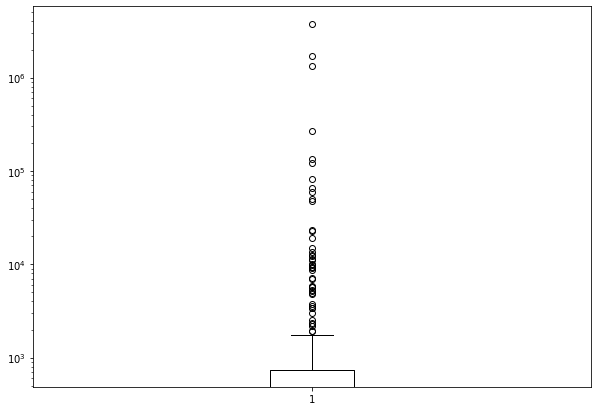

A =  Sum-Avg-Р823    12.199266
dtype: float64
|A| / sigmaA =  Sum-Avg-Р823    84.22922
dtype: float64


In [9]:
fig = plt.figure(figsize=(10,7))
pl=fig.add_subplot(111)

pl.boxplot(D)

plt.yscale('log')
plt.show()

n=len(D)

A = (((D-D.mean())**3).sum()/n)/D.std()**3
sigmaA = sqrt((6*(n-1))/((n+1)*(n+3)))

print('A = ',A)
print('|A| / sigmaA = ', abs(A)/sigmaA)

A > 0, => распределение скошено вправо. |A| / sigmaA > 3, => присутствует существенная асимметрия. Присутствет большое количество выбросов => коэффициент асимметрии не имеет смысла.

In [10]:
E = (((D-D.mean())**4).sum()/n)/D.std()**4-3
sigmaE = sqrt((24*n*(n-2)*(n-3))/((n-1)**2*(n+3)*(n+5)))

print('E = ',E)
print('|E| / sigmaE = ', abs(E)/sigmaE)

E =  Sum-Avg-Р823    161.954794
dtype: float64
|E| / sigmaE =  Sum-Avg-Р823    565.081054
dtype: float64


E > 0, => распределение островершинно. |E| / sigmaE значительно больше 3, => присутствуют существееные отколнения. => Е не существенно и не имеет смысла.

# Блок 2

# Задание 1

In [11]:
D2=np.array(data[['Sum-Avg-Р822']])
D1=np.array(D)
DHist = np.histogram(D)

DInterv=[]
D2Groups=[]
for i in range(len(DHist[1])-1):
    group=[]
    j=0
    left=DHist[1][i]
    right = DHist[1][i+1]
    DInterv.append(str(left)+'-'+str(right))
    for val in D1:
        if left<val<=right:
            group.append(D2[j])
            j+=1
    D2Groups.append(np.array(group))
    
D2GroupsD=pd.DataFrame()
D2GroupsD['D_interv']=pd.Series(DInterv)
D2GroupsD['D2_group_chast']=pd.Series([len(x)  for x in D2Groups])
D2GroupsD['D2_group_srzn']=pd.Series([ (x.mean() if len(x)>0 else 0) for x in D2Groups])
D2GroupsD['D2_group_disp']=pd.Series([ (x.std()**2 if len(x)>0 else 0) for x in D2Groups])

display(D2GroupsD)

,D_interv,D2_group_chast,D2_group_srzn,D2_group_disp
0,0.0-379966.8266833333,136,167384.895675,2.071857e+12
1,379966.8266833333-759933.6533666666,0,0.000000,0.000000e+00
2,759933.6533666666-1139900.48005,0,0.000000,0.000000e+00
3,1139900.48005-1519867.3067333333,1,130.300000,0.000000e+00
4,1519867.3067333333-1899834.1334166666,1,130.300000,0.000000e+00
5,1899834.1334166666-2279800.9601,0,0.000000,0.000000e+00
6,2279800.9601-2659767.7867833334,0,0.000000,0.000000e+00
7,2659767.7867833334-3039734.6134666665,0,0.000000,0.000000e+00
8,3039734.6134666665-3419701.4401499997,0,0.000000,0.000000e+00
9,3419701.4401499997-3799668.2668333333,1,130.300000,0.000000e+00


# Задание 2

In [12]:
SrGroupDisp = (D2GroupsD['D2_group_disp']*D2GroupsD['D2_group_chast']).sum()/D2GroupsD['D2_group_chast'].sum()
MezhgroupDisp = (((D2GroupsD['D2_group_srzn']-D2.mean())**2)*D2GroupsD['D2_group_chast']).sum()/D2GroupsD['D2_group_chast'].sum()

print('SrGroupDisp ',D2.std()**2)
print('ObshDisp ',SrGroupDisp+MezhgroupDisp)
print('% Oshibki',min(SrGroupDisp,MezhgroupDisp)/max(SrGroupDisp,MezhgroupDisp)*100)

SrGroupDisp  1035489509887.9943
ObshDisp  2030528055960.943
% Oshibki 0.16708095599910808


In [13]:
#from cmath import sqrt
#EmpirCofCorr = sqrt(1-SrGroupDisp/(D2.std()**2)) по этой формуле получается комплексное число, странно
EmpirCofCorr = sqrt(MezhgroupDisp/(D2.std()**2))
print(EmpirCofCorr)

0.057191648160625386


Эмпирический коэффициент корреляции < 0.3 => связь параметров "Sum-Avg-Р823" и "Sum-Avg-Р822" слабая и вероятно имеет случайный характер.

# Задание 3

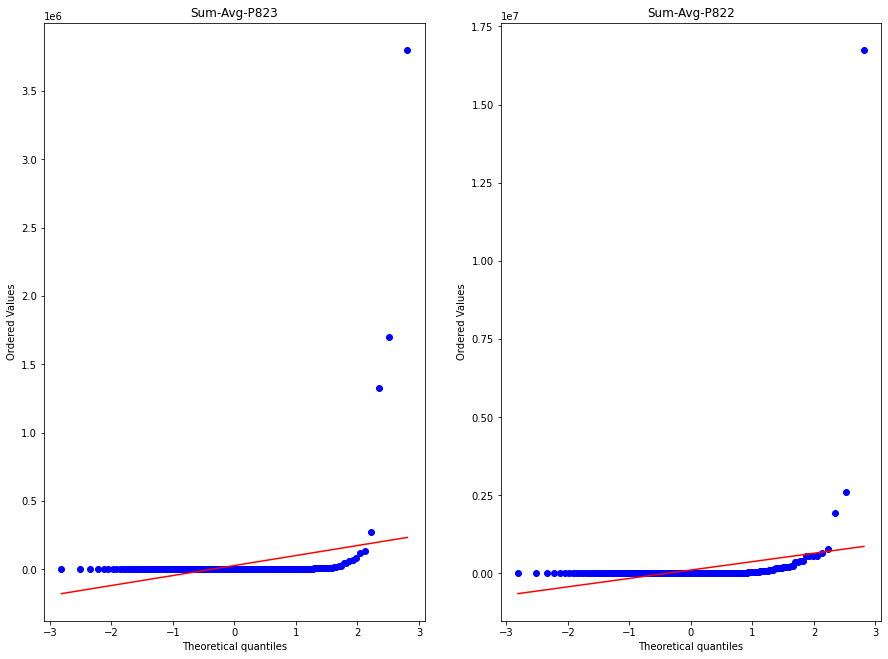

In [17]:
import scipy
import pylab
import scipy.stats as stats

D1 = data['Sum-Avg-Р823']
D2 = data['Sum-Avg-Р822']

fig = plt.figure(figsize=(15,11))

pl1 = fig.add_subplot(121)
pl2 = fig.add_subplot(122)

D1 = stats.probplot(D1, dist='norm', plot=pl1)
D2 = stats.probplot(D2, dist='norm', plot=pl2)

pl1.set_title('Sum-Avg-Р823')
pl2.set_title('Sum-Avg-Р822')

plt.show()

Оба параметра не распределены по нормальному закону

# Задание 4

In [36]:
D2=np.array(data['Sum-Avg-Р822'])
D1=np.array(data['Sum-Avg-Р823'])

cov = (D1*D2).mean()-D1.mean()*D2.mean()
norm = D1.std()*D2.std()
PirsonCorr = cov/norm

print('Pirson corr coef  = ', PirsonCorr)


Pirson corr coef  =  0.43499723682866426


Коэффициент корреляции Пирсона находится в диапозоне [0.3,0.5) => присутствует умеренная корреляция.

In [40]:
from scipy.stats import t

Alpha = 0.05
StFreedom = len(D1)-2                               

NablT = PirsonCorr/(sqrt(1-PirsonCorr**2))*sqrt(data['Sum-Avg-Р823'].shape[0]-2)
CritT = t.ppf(1-Alpha/2,4)

print('NablT ',NablT)
print('CritT ',CritT)

NablT  8.06933566789844
CritT  2.7764451051977987


Наблюдаемое значение критерия > критического => отвергаем гипотезу H0 => Т имеет вид распрделения Стьюдента и связи между параметрами "Sum-Avg-Р823" и "Sum-Avg-Р822" нет.

# Задание 5

In [41]:
dataN = data.select_dtypes(['float','int']).copy()
display(dataN.head())

,Sum-Avg-Р811,Sum-Avg-Р812,Sum-Avg-Р813,Sum-Avg-Р814,Sum-Avg-Р815,Sum-Avg-Р821,Sum-Avg-Р822,Sum-Avg-Р823,Sum-Avg-Р824,Sum-Avg-Р825,Sum-Avg-Р826
0,1918.825000,8954.625,33.725,1796.25,11138.525000,25412.325000,130.3,30.0000,18.85,17.200000,0.00
1,6811.933333,0.000,0.000,0.00,79440.066667,9480.033333,0.0,815.1000,0.00,48562.933333,0.00
2,71255.825000,0.000,0.000,0.00,51530.400000,87166.625000,0.0,4957.3925,0.00,41171.825000,6267.70
3,1230.500000,0.000,0.000,0.00,371.900000,478.200000,0.0,0.0000,0.00,0.000000,0.00
4,8225.300000,0.000,0.000,0.00,4965.700000,2213.350000,0.0,0.0000,0.00,0.000000,2752.35


In [43]:
corr = np.array(dataN.corr())

def matrix_minor(arr, i, j):
    return np.delete(np.delete(arr,i,axis=0), j, axis=1)

stolbName = {k:v for k,v in zip(dataN.columns,list(range(dataN.shape[1])))}

i=stolbName['Sum-Avg-Р823']
j=stolbName['Sum-Avg-Р822']

minor_ij =  matrix_minor(corr,i,j)
minor_ii =  matrix_minor(corr,i,i)
minor_jj =  matrix_minor(corr,j,j)

A_ij = (-1)**(i+j)*np.linalg.det(minor_ij)
A_ii = np.linalg.det(minor_ii)
A_jj = np.linalg.det(minor_jj)

ChCorrCoef = -A_ij/sqrt(A_ii*A_jj)
print('Chastn corr coef = ',ChCorrCoef)

Chastn corr coef =  0.20170375907165827


# Задание 6

Коэффициент Спирмена

In [45]:
from collections import Counter

dataRank = data[['Sum-Avg-Р823','Sum-Avg-Р822']].rank()

def Tx(series):
    chastot = np.array(list(Counter(series).values()))
    T = 0.5*(chastot**3-chastot).sum()
    return T

a = 1/6*(dataRank.shape[0]**3 - dataRank.shape[0])
s = ((dataRank['Sum-Avg-Р823']-dataRank['Sum-Avg-Р822'])**2).sum()
Tx1 = Tx(data['Sum-Avg-Р823'])
Tx2 = Tx(data['Sum-Avg-Р822'])

SpearmanCorr = (a-s-Tx1-Tx2) / (sqrt((a- 2*Tx1)* (a - 2*Tx2)))
Tcrit = t.ppf(1 - 0.05, dataRank.shape[0]-2)*sqrt((1-SpearmanCorr**2)/(dataRank.shape[0]-2))

print('Nabl ',abs(SpearmanCorr))
print('Crit ',Tcrit)

Nabl  0.22961153140576326
Crit  0.09616309941055128


Наблюдаемое значение > критического => нулевая гипотеза отвергается с вероятностью ошибки 0,95

Коэффициент Кендалла

In [54]:
def MyKendall(dataFrame,columns):
    P=0
    Q=0

    dataRank = dataFrame[columns].rank()
    dataRanksort = dataRank.sort_values(by=columns[0],axis=0, ascending=True)
    
    for i in range(dataRanksort.shape[0]):
        df1 = dataRanksort.iloc[i+1:,1]
        P+= df1[df1 > dataRanksort.iloc[i,1]].count()
    
    for i in range(dataRanksort.shape[0]):
        df1 = dataRanksort.iloc[i+1:,1]
        Q+= df1[df1 < dataRanksort.iloc[i,1]].count()
    
    S=P-Q
    n = dataRanksort.shape[0]
    
    return 2*S/(n*(n-1))

KebndallCorr = MyKendall(data,['Sum-Avg-Р823','Sum-Avg-Р822'])

print('Kendall corr coef = ',KebndallCorr)
print('Kendall corr 2/3 Sprearman corr : ', (2/3)*abs(SpearmanCorr))

Kendall corr coef =  0.33220640569395016
Kendall corr 2/3 Sprearman corr :  0.15307435427050883
